# Exemplos de visualização de informações

Neste notebook serão apresentados diversos tipos de visualização que podem ser utilizados em diversos projetos. Serão apresentados os seguintes tipos de gráficos:

- Gráfico de linha
- Gráfico de área
- Histogramas
- Gráfico de Barras
- Diagrama de Caixa (Box Plot)
- Gráfico de Dispersão
- Gráfico de Bolhas

**As visualizações serão geradas a partir de um conjunto de dados armazenado a partir da utilização da biblioteca pandas, portanto, o ínicio do noteook apresenta algumas informações a respeito do conjunto de dados e posteriormente será iniciada a parte referente a visualização.**

### O Dataset
Fonte: [International migration flows to and from selected countries - The 2015 revision](http://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.shtml?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork-20297740&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).

Esta base contem dados anuais de imigrantes internacionais registrados com base em seu país de destino. Os dados apresentam tanto as entradas e saídas de acordo com o local de nascimento, nacionalidade ou local de residência, tanto para para estrangeiros quanto para locais. A versão atual apresenta os dados referentes a 45 paises, neste caso iremos focar nos dados de imigração do Canadá.

Para tanto, um novo dataset foi criado e está salvo na mesma pasta deste notebook com o nome "Canadian_Imigration.csv".

## Início - Organizando os dados

In [16]:
#importando as bibliotecas
import numpy as np
import pandas as pd

In [17]:
#lendo o arquivo csv
df_can = pd.read_csv('Canadian_Imigration.csv')

In [18]:
#verificando as informações do dataset
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [19]:
#obtendo o nome das colunas para depois remover as que não serão necessárias
df_can.columns.values

array(['Type', 'Coverage', 'OdName', 'AREA', 'AreaName', 'REG', 'RegName',
       'DEV', 'DevName', '1980', '1981', '1982', '1983', '1984', '1985',
       '1986', '1987', '1988', '1989', '1990', '1991', '1992', '1993',
       '1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001',
       '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013'], dtype=object)

In [20]:
df_can.shape

(195, 43)

**Não utilizaremos algumas colunas, portanto elas serão removidas da base**

In [21]:
# in pandas axis=0 represents rows (default) and axis=1 represents columns.
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

Vamos renomear as colunas para que façam sentido. Para isso, o metodo `rename()` é utilizado passando um dicionário com os nomes antigos e novos, conforme abaixo:

In [23]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)
df_can.columns

Index(['Country', 'Continent', 'Region', 'DevName', '1980', '1981', '1982',
       '1983', '1984', '1985', '1986', '1987', '1988', '1989', '1990', '1991',
       '1992', '1993', '1994', '1995', '1996', '1997', '1998', '1999', '2000',
       '2001', '2002', '2003', '2004', '2005', '2006', '2007', '2008', '2009',
       '2010', '2011', '2012', '2013'],
      dtype='object')

A seguir algumas operações serão realizadas para auxiliar na plotagem dos gráficos, são elas:
- Alterar o formato das colunas para string
- Criar uma listagem dos anos para facilitar a plotagem posterior
- Remover o nome da coluna de indíces
- Criar uma coluna chamada Total, que suma o total de imigrações daquele país em todos os anos


In [24]:
df_can.columns = list(map(str, df_can.columns))

years = list(map(str, range(1980, 2014)))

df_can.index.name = None

df_can['Total'] = df_can.sum(axis=1)

df_can.set_index('Country', inplace=True)

## Matplotlib

Agora que já organizamos o conjunto de dados a ser analisado, daremos inicio a visualização das informações. 

Estaremos utilizando a biblioteca Matplotlib, responsável pela plotagem de graficos em 2D que produz figuras de qualidade em diversos formatos diferentes. 

### Matplotlib.Pyplot

Um dos aspectos mais importantes da biblioteca Matplotlib é o método `pyplot`. Através dele podemos utilizar diversos comandos para alterar o estilo e adicionar mais elementos às nossas figuras. Cada função do `pyplot` é responsável por criar uma figura, criar uma nova plotagem, adicionar linhas, rótulos, entre outros.

Portanto, daremos início importando esta biblioteca, e realizando algumas configurações para que as imagens sejam exibidas logo abaixo dos comandos, e também a utilização de um estilo específico para os gráficos.

In [25]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot')

### Gráficos de linha

Este é um tipo de grafico que exibe as informações como uma série de pontos chamados de "marcadores", conectados por segmentos de linhas. Este tipo de visualização é utilizado quando se possui um dataset contínuo, como por exemplo dados de um determinado período em específico.

**Estudo de Caso**

Em 2020, o Haiti passou por um terromoto de magnitude 7.0, devastando varias cidades e causando a perda de muitas vidas. Como parte de uma medida humanitária, o Canada aceitou o recebimento de refugiados do Haiti. 
É possível visualizar esse moviemtno através de um gráfico de linhas:


In [28]:
#filtrando apenas as informações referentes ao Haiti
haiti = df_can.loc['Haiti', years] # passando os anos para não selecionar a coluna "Total" junto
haiti.head()

1980    1666
1981    3692
1982    3498
1983    2860
1984    1418
Name: Haiti, dtype: object

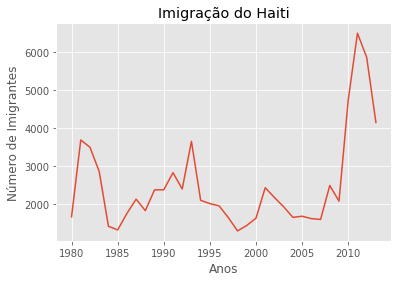

In [30]:
haiti.index = haiti.index.map(int) # alterando os indices para inteiro para melhor exibição do grafico
haiti.plot(kind='line') # tipo de grafico: linha

plt.title('Imigração do Haiti')
plt.ylabel('Número de Imigrantes')
plt.xlabel('Anos')

plt.show() # após adicionar os elementos à figura, esta linha exibe o que foi gerado

Através desse gráfico é possível ver como o número de imigrandes do Haiti aumentou em 2010.

Também é possível plotar as imigrações de mais de um país ao mesmo tempo, a fim de comparar as os números.

Neste caso utilizaremos a Indía e China.

In [32]:
#criando um dataframe com as informações de China e India
df_CI = df_can.loc[['India', 'China'], years]
df_CI.head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129


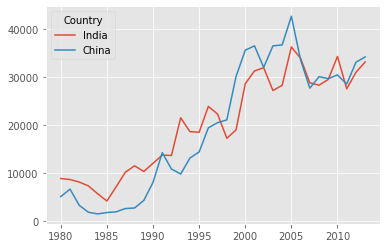

In [33]:
# é necessário utilizar a transposta do dataframe, isso significa inverter as linhas e as colunas.
df_CI.T.plot()

Com isso, conseguimos comparar os movimentos migratórios da China e da India para o Canadá ao longo dos anos.

### Gráfico de Área

Este tipo de gráfico é similar ao gráfico de linhas, porém possui um sombreamento abaixo. Ao plotar mais de uma informação, é possível comparar a área ocupada por cada uma delas. 

Neste gráfico em específico vamos comprar os cinco paises que mais imigraram para o Canadá.

Inicialmente, é necessário separar os dados a serem plotados.

In [35]:
#ordenando o dataframe para obter os maiores no começo
df_can.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# pegando as 5 maiores entradas
df_top5 = df_can.head()

# obtendo a transposta
df_top5 = df_top5[years].transpose() 

#exibindo o dataframe criado
df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


Gráficos de área são empilhados por padrão. Porém é possível alterar essa configuração através do parâmetro `stacked`.

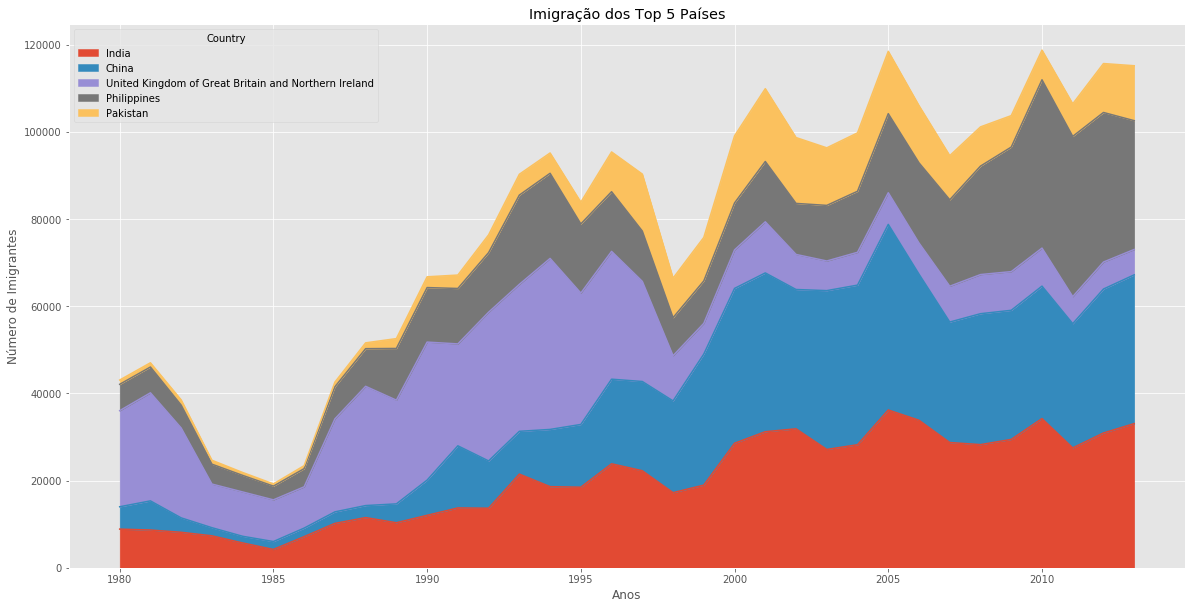

In [36]:
df_top5.index = df_top5.index.map(int) # alterando o formato do indice para inteiro
df_top5.plot(kind='area',  #tipo do grafico: area
             stacked=True, #configuração para obter um grafico empilhado
             figsize=(20, 10), # tamanho da figura
             )

plt.title('Imigração dos Top 5 Países')
plt.ylabel('Número de Imigrantes')
plt.xlabel('Anos')

plt.show()

### Histogramas

O hitograma representa a distribuição do conjunto de dados em frequências. As bases dos retângulos representam as classes possíveis para os dados. 

Por padrão, o método `histogram` quebra o conjunto de dados em 10 classes, porém nem sempre esse número é o melhor. Portanto realizaremos algumas alterações para alterar esse número.

para visualizar os histogramas, iremos comparar a ditribuição da imigração da Dinamarca, Noruega e Suécia.

In [37]:
df_t = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_t.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


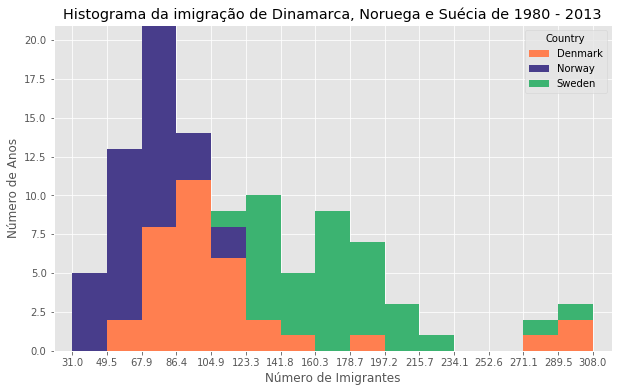

In [39]:
count, bin_edges = np.histogram(df_t, 15)
xmin = bin_edges[0] - 10   #  adicionando o valor 10 por razões estéticas
xmax = bin_edges[-1] + 10  #  adicionando o valor 10 por razões estéticas


df_t.plot(kind='hist',      #tipo do grafico: histograma
          figsize=(10, 6),  # tamanho da figura
          bins=15, #numero de classes
          xticks=bin_edges, #divisoes das categorias
          color=['coral', 'darkslateblue', 'mediumseagreen'], #cores
          stacked=True, # empilhado
          xlim=(xmin, xmax) # limites
         )

plt.title('Histograma da imigração de Dinamarca, Noruega e Suécia de 1980 - 2013')
plt.ylabel('Número de Anos')
plt.xlabel('Número de Imigrantes') 

plt.show()

### Gráficos de Barra

Um gráfico de barras é uma forma de representar os dados onde as barras representam a magnitude/tamanho da variável. 
Este tipo de gráfico pode ser vertical ou horizontal, onde o parâmetro `kind` deve ser alterado para `bar` quando se busca um gráfico vertical e `barh` para um gráfico horizontal.

**Efeito da crise econômica da Islândia entre 2008 - 2011**


Durante os anos de 2008 a 2011 a Islândia sofreu uma crise financeira que influênciou os movimentos migratórios.


In [40]:
# obter os dados
df_iceland = df_can.loc['Iceland', years]
df_iceland.head()

1980    17
1981    33
1982    10
1983     9
1984    13
Name: Iceland, dtype: object

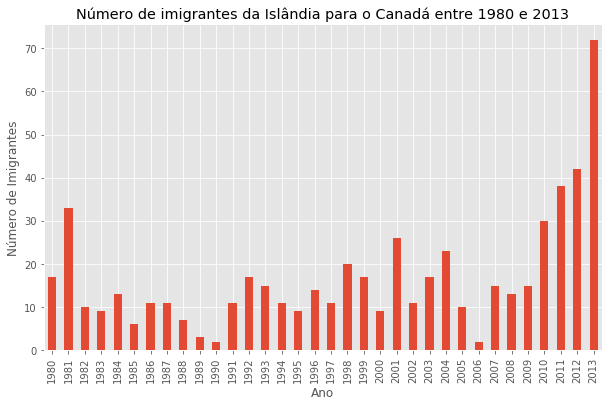

In [41]:
df_iceland.plot(kind='bar', figsize=(10, 6)) #tipo do grafico e tamanho da figura

plt.xlabel('Ano') 
plt.ylabel('Número de Imigrantes') 
plt.title('Número de imigrantes da Islândia para o Canadá entre 1980 e 2013') 

plt.show()

**Gráficos de Barra Horizontais**

Em alguns momentos é melhor representar os dados horizontalmente.

Neste caso vamos ver os 15 países que mais imigraram para o Canadá entre 1980 e 2013.

In [42]:
#organizando os dados
df_can.sort_values(by='Total', ascending=True, inplace=True)
df_top15 = df_can['Total'].tail(15)

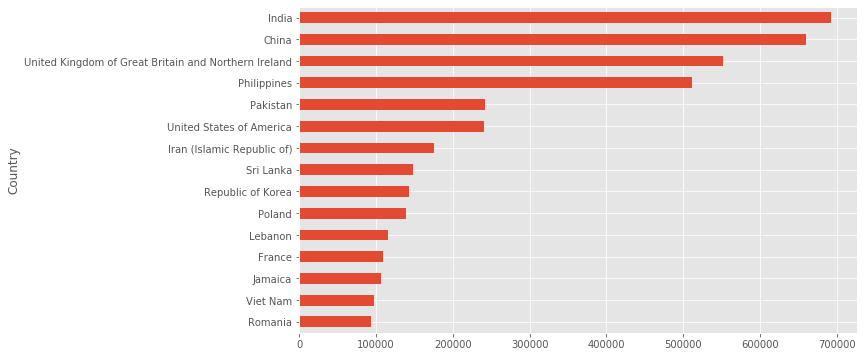

In [43]:
df_top15 = df_top15.transpose()
df_top15.plot(kind='barh', figsize=(10,6))
plt.show()

# Gráfico de Caixa

O gráfico de caixa é uma forma de representar estatísticamente a distribuição ao longo de 5 dimensões:

-   **Mínimo:** Menor número no dataset.
-   **Primeiro Quartil:** Número médio entre o `mínimo` e a `mediana`
-   **Segundo Quartil (Mediana):** valor que separa a metade maior e a metade menor do conjunto de dados.
-   **Terceiro Quartil:** Número médio entre a `mediana` e o `máximo`.
-   **Máximo:** Maior valor no conjunto de dados.

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/boxplot_complete.png" width=440, align="center">

Vamos verificar o número de imigrantes japoneses entre 1980 e 2013.

In [44]:
# extraindo os dados
df_japan = df_can.loc[['Japan'], years].transpose()
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


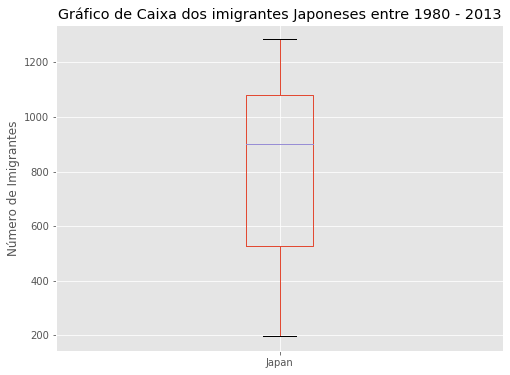

In [45]:
df_japan.plot(kind='box', figsize=(8, 6))

plt.title('Gráfico de Caixa dos imigrantes Japoneses entre 1980 - 2013')
plt.ylabel('Número de Imigrantes')

plt.show()

Algumas conclusões podem ser obtidas a partir do gráfico acima:
1. O menor número de imigrantes é aproximadamente 200 (min), o maior número de imigrantes é de 1300 (max), e a mediana é por volta de 900.
2. 25% dos anos tiveram ~500 ou menos (Primeiro Quártil);
3. 75% dos anos tiveram ~1100 ou menos (Terceiro Quártil).

Também é possível ver esses números através do método `describe()`.

In [46]:
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


Um dos benefícios dos gráficos de caixas é comparar a distribuição entre diferentes conjuntos de dados.

Anteriormente utilizamos as informações da China e da Indía, neste momento utilizaremos a mesma informação, porém plotando o grafico de caixa e o gráfico de linha na mesma figura.

Para tanto, serão utilizados `subplots`, que possibilitam mais de um gráfico na mesma figura. Porém, neste caso é necessário utilizar outra forma de criação das figuras, chamado de **artist layer**, no lugar da **script layer**, que tem sido utilizada ate o momento. 

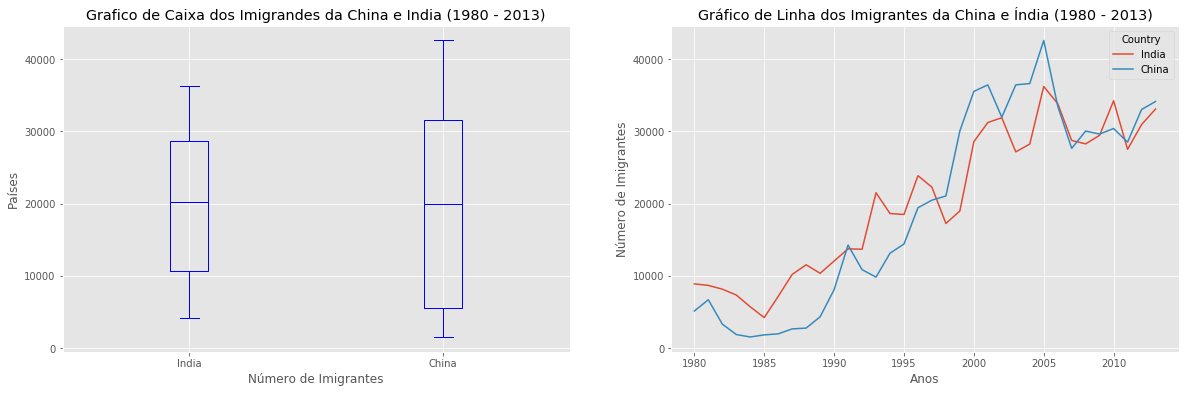

In [48]:
fig = plt.figure() # cria uma figura nova

ax0 = fig.add_subplot(1, 2, 1) # adiciona o subplot 1 (1 linha, 2 colunas, primeiro grafico)
ax1 = fig.add_subplot(1, 2, 2) # adiciona o subplot 2 (1 linha, 2 colunas, segundo grafico). 

# Subplot 1
df_CI.T.plot(kind='box', color='blue', vert=True, figsize=(20, 6), ax=ax0) # adiciona ao subplot 1
ax0.set_title('Grafico de Caixa dos Imigrandes da China e India (1980 - 2013)')
ax0.set_xlabel('Número de Imigrantes')
ax0.set_ylabel('Países')

# Subplot 2
df_CI.T.plot(kind='line', figsize=(20, 6), ax=ax1) # adiciona ao subplot 2
ax1.set_title ('Gráfico de Linha dos Imigrantes da China e Índia (1980 - 2013)')
ax1.set_ylabel('Número de Imigrantes')
ax1.set_xlabel('Anos')

plt.show()

Pode ser observado que enquanto os dois paises possuem aproximadamente a mesma mediana de imigrantes (~20.000), o restante dos números varia entre um país e outro. Sendo que a China possui aproximadamente 15% a mais de imigrantes em seu maior ano se comparado com a Índia.

# Gráfico de Dispersão (Scatter Plot)


Este tipo de gráfico apresenta uma forma útil de comparar variáveis entre si. São similares aos graficos de linhas no sentido de mapear as variaveis dependentes e independentes em um gráfico 2D, a diferença é que no gráfico de dispersão, os pontos não são conectados por uma linha. Neste tipo de visualização, os dados normalmente representam uma tendencia, onde através de uma analise mais aprofudada, e da utilização de outras ferramentas, seria similar a regressão, sendo possível utilizar cálculos matematicos para identificar o relacionamento entre as variáveis e estimar futuros pontos. 

Neste exemplo, vamos visualizar o total de imigrantes para o Canadá (todos os países combinados) para os anos de 1980 a 2013.

Passo 1: Extrair o conjunto de dados. Já que iremos cruzar as informações `anos` e `total de imigrantes`, devemos converter a coluna `years` para o tipo `inteiro`.


In [50]:
# somando os anos
df_tot = pd.DataFrame(df_can[years].sum(axis=0))

# alterando o tipo da coluna para inteiro
df_tot.index = map(int, df_tot.index)

# resentando a coluna indice para que ela volte para o dataframe
df_tot.reset_index(inplace = True)

# renomeando as colunas
df_tot.columns = ['year', 'total']

# visualizando o dataset
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


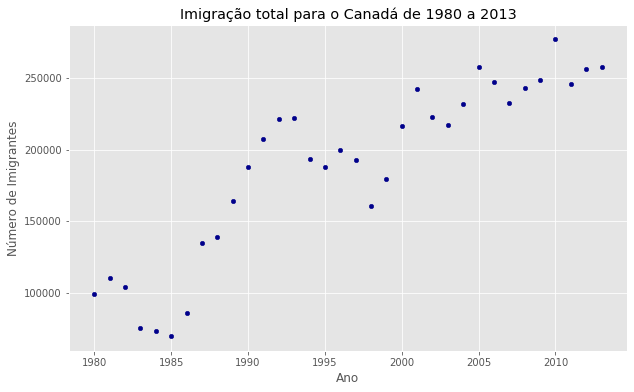

In [51]:
#criando o grafico
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

#adicionando elementos gráficos
plt.title('Imigração total para o Canadá de 1980 a 2013')
plt.xlabel('Ano')
plt.ylabel('Número de Imigrantes')

plt.show()

Conforme falado anteriormente, podemos perceber que ao longo dos anos o número de imigrantes aumenta. Portanto seria possível traçar uma linha de tendência para os próximos anos.

### Gráfico de Bolhas (Bubble Plots)

É uma variação do gráfico de dispersão que exibe as informações em três dimensões (x,y, z). Os pontos são substituídos por bolhas, e o tamanho de cada bolha é representado pela variável 'z', também chamada de peso. 


**Crise na Argentina**.

A Argentina passou por uma grande crise entre 1998 e 2002, que causou desemprego, protestos, mudança de governos e um aumento nas dívidas do país.

Vamos analisar o efeito dessa crise e comparar a imigração da Argentina com o Brasil.

Passo 1: Extrair as informações necessárias. Também será necessário converter `years` para o tipo inteiro.

In [52]:
# extraindo as informações já transpostas
df_can_t = df_can[years].transpose() 

# alterando a coluna anos para inteiro
df_can_t.index = map(int, df_can_t.index)

# alterando o nome do indice para corresponder a coluna Anos
df_can_t.index.name = 'Year'

# Resetando o indice para que a coluna anos volte a ser uma coluna
df_can_t.reset_index(inplace=True)

# visualizando o conjunto de dados
df_can_t.head()

Country,Year,Palau,Western Sahara,Marshall Islands,New Caledonia,San Marino,American Samoa,Tuvalu,Sao Tome and Principe,Vanuatu,...,Poland,Republic of Korea,Sri Lanka,Iran (Islamic Republic of),United States of America,Pakistan,Philippines,United Kingdom of Great Britain and Northern Ireland,China,India
0,1980,0,0,0,0,1,0,0,0,0,...,863,1011,185,1172,9378,978,6051,22045,5123,8880
1,1981,0,0,0,0,0,1,1,0,0,...,2930,1456,371,1429,10030,972,5921,24796,6682,8670
2,1982,0,0,0,0,0,0,0,0,0,...,5881,1572,290,1822,9074,1201,5249,20620,3308,8147
3,1983,0,0,0,0,0,0,0,0,0,...,4546,1081,197,1592,7100,900,4562,10015,1863,7338
4,1984,0,0,0,0,0,0,1,0,0,...,3588,847,1086,1977,6661,668,3801,10170,1527,5704


Passo 2: Criando os pesos normalizados.

Existem diversos metodos de normalização de variáveis. Neste caso utilizaremos o tipo de normalização `min max`, onde os valores são convertidos para um invervalo predefinido de acordo com os valores Minimo e Máximo do conjunto de dados, de acordo com a seguinte fórmula:

<img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Images/Mod3Fig3FeatureScaling.png" align="center">


Onde `X` representa o valor original e `X'` representa o valor normalizado, que deverá ser entre 0 e 1. Este valor será utilizado como tamanho de cada bolha.

In [53]:
# normalize Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())

# normalize Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())

Passo 3: Plotando os gráficos.

Como os valores de escala estão entre 0 e 1 não será possível visualizá-los. Por isso, vamos multiplicar os valores obtidos por 2000, e somar 10, uma vez que algum dos valores poderá ser igual a 0, e portanto não seria exibido (2000 X 0 = 0).

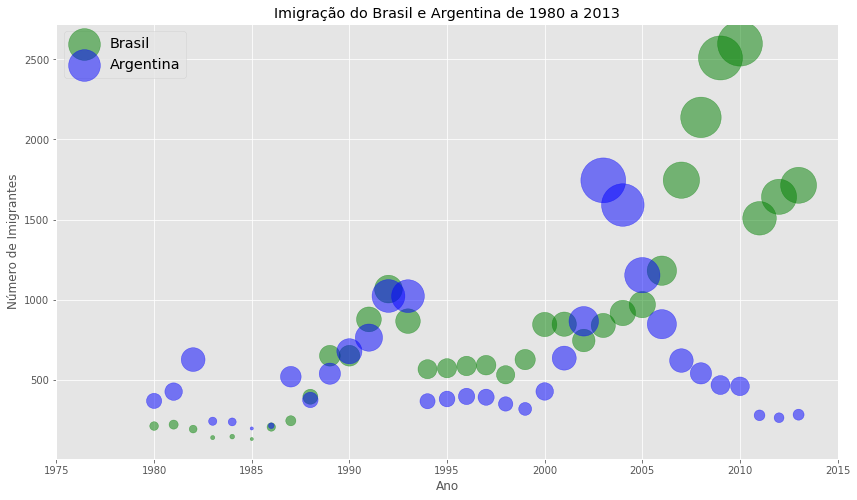

In [56]:
# Brasil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,                  # Transparencia
                    color='green',
                    s=norm_brazil * 2000 + 10,  # Pesos
                    xlim=(1975, 2015)
                   )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Número de Imigrantes')
ax0.set_xlabel('Ano')
ax0.set_title('Imigração do Brasil e Argentina de 1980 a 2013')
ax0.legend(['Brasil', 'Argentina'], loc='upper left', fontsize='x-large')

O tamanho das bolhas corresponde ao número de imigrantes para um determinado ano. 

A partir do gráfico acima podemos ver que durante a crise na Argentina entre os anos 1998 e 2002 houve um aumento no número de imigrantes para o Canadá.

Alguns anos depois, o Brasil também passou por uma crise, que teve seu ponto máximo em 2010, fato este que pode ser visualizado através do aumento do número de imigrações neste período.

# Conclusão

Neste notebook foram apresentadas algumas possibilidades para a visualização de informações utilizando Python. Foi utilizada a biblioteca `matplotlib` e diversos gráficos diferentes. Dependendo do objetivo e da informação a ser apresentada, determinados gráficos devem ser utilizados.

**Recomendo a leitura do livro Storytelling with Data**, da autora Cole Nussbaumer Knaflic, que apresenta diversos tipos de visualização e dicas para utilização de cada uma delas.